In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utils import *
import glob
from scipy import stats

In [2]:
#reading data
d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=['SOILWATER_10CM','ET','PREC']
ds=xr.Dataset()
for v in dvs:
    files=sorted(glob.glob(d+v+'*.nc'))
    ds[v]=xr.open_mfdataset(files,combine='by_coords')[v]
ds=ds.sel(year=slice(2020,2100))

In [4]:
#reorganizing data
nx=20
ee=int(np.round(len(ds.ens)/nx))
dsq=xr.Dataset()
for v in ['SOILWATER_10CM','PREC','ET']:
    das=[x.sortby(s) for x,s in zip(ds[v],ds['SOILWATER_10CM'])]
    dsq[v]=xr.concat([xr.concat([da.sel(ens=slice(ee*i,ee+ee*i)) 
                            for i in range(nx)],
                           dim='quantile') 
                 for da in das],dim='year')

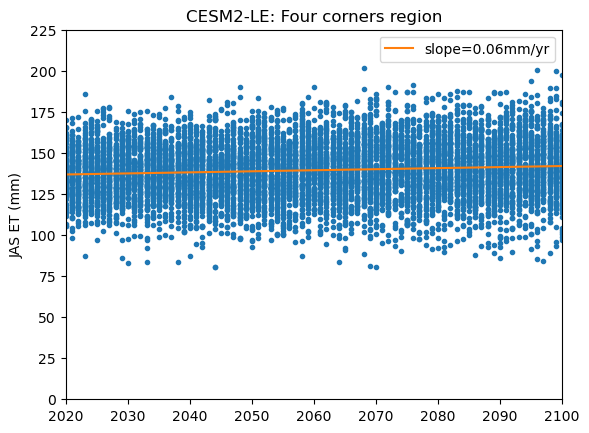

In [7]:
cf=24*60*60*92
et=cf*dsq.ET.stack({'eqy':['ens','quantile','year']}).swap_dims({'eqy':'year'})
et['year']=et.year.values
p=et.polyfit(dim='year',deg=1)
m=np.round(p.polyfit_coefficients.sel(degree=1).values,2)
plt.plot(et.year,et,'.')
plt.plot(ds.year,xr.polyval(ds.year,p.polyfit_coefficients),
         label='slope='+str(m)+'mm/yr')
plt.xlim([2020,2100])
plt.ylim([0,225])
plt.legend()
plt.ylabel('JAS ET (mm)')
plt.title('CESM2-LE: Four corners region');

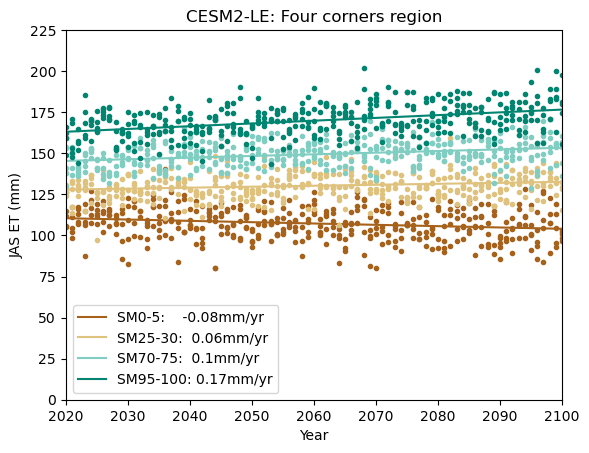

In [24]:
v = 'ET'

#compute ET and perform regression
x = cf * dsq[v].stack({'ensyear': ['ens', 'year']}).swap_dims({'ensyear': 'year'})
x['year'] = x.year.values
p = x.polyfit(dim='year', deg=1)
fits = xr.polyval(ds.year, p.polyfit_coefficients)

#plotting
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571']
for c, q in zip(colors, [0, 5, 14, 19]):
    m = np.round(p.polyfit_coefficients.sel(quantile=q, degree=1).values, 2)
    label = ('SM' + str(int(100*q/nx)) + '-' +
             str(int(100/nx + 100*q/nx)) + ':').ljust(10) + str(m) + 'mm/yr'
    plt.plot(x.year, x.sel(quantile=q), '.', color=c)
    plt.plot(ds.year, fits.sel(quantile=q), color=c, label=label)
plt.xlim([2020, 2100])
plt.ylim([0, 225])
plt.legend(loc=3)
plt.xlabel('Year')
plt.title('CESM2-LE: Four corners region')
plt.ylabel('JAS '+v+' (mm)');

### useful xarray functions
 - lm = da.polyfit(dim='year', deg=1)
    - regress a DataArray against one of its coordinates
 - fit = xr.polyval(da.year, lm.polyfit_coefficients)
    - evaluate the regression line for plotting
    - plt.plot(da.year,fit)
 - da.stack({'ensyear': ['ens', 'year']})
    - stack ensemble and year into one dimension

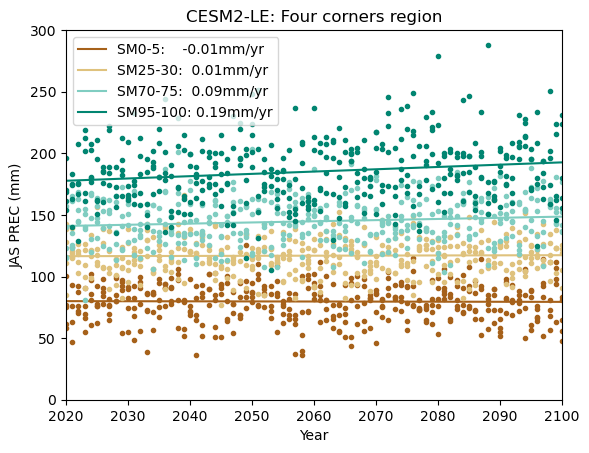

In [27]:
v = 'PREC'

#compute ET and perform regression
x = cf * dsq[v].stack({'ensyear': ['ens', 'year']}).swap_dims({'ensyear': 'year'})
x['year'] = x.year.values
p = x.polyfit(dim='year', deg=1)
fits = xr.polyval(ds.year, p.polyfit_coefficients)

#plotting
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571']
for c, q in zip(colors, [0, 5, 14, 19]):
    m = np.round(p.polyfit_coefficients.sel(quantile=q, degree=1).values, 2)
    label = ('SM' + str(int(100*q/nx)) + '-' +
             str(int(100/nx + 100*q/nx)) + ':').ljust(10) + str(m) + 'mm/yr'
    plt.plot(x.year, x.sel(quantile=q), '.', color=c)
    plt.plot(ds.year, fits.sel(quantile=q), color=c, label=label)
plt.xlim([2020, 2100])
plt.ylim([0, 300])
plt.legend(loc=2)
plt.xlabel('Year')
plt.title('CESM2-LE: Four corners region')
plt.ylabel('JAS '+v+' (mm)');

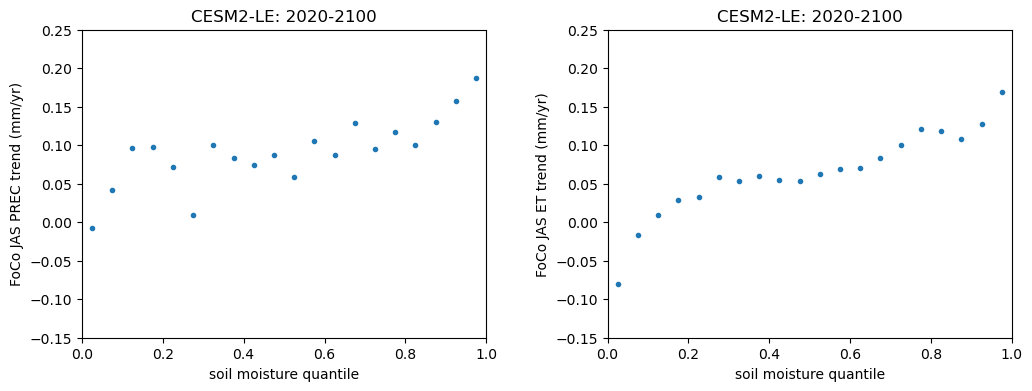

In [31]:
plt.figure(figsize=[12,4])
for i,v in enumerate(['PREC','ET']):
    plt.subplot(121+i)
    x=cf*dsq[v].stack({'ey':['ens','year']}).swap_dims({'ey':'year'})
    x['year']=x.year.values
    p=x.polyfit(dim='year',deg=1)
    plt.plot(np.arange(nx)/nx+1/nx/2,p.polyfit_coefficients.sel(degree=1),'.')
    plt.xlim([0,1])
    plt.xlabel('soil moisture quantile')
    plt.ylabel('FoCo JAS '+v+' trend (mm/yr)')
    plt.ylim([-0.15,0.25])
    plt.title('CESM2-LE: 2020-2100')
plt.subplots_adjust(wspace=0.3)

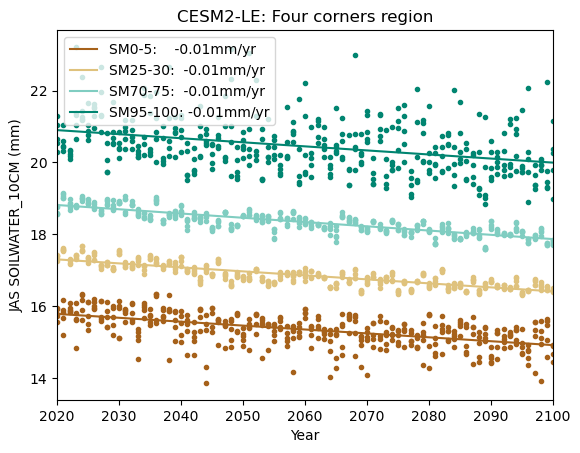

In [33]:
v = 'SOILWATER_10CM'

#compute ET and perform regression
x = dsq[v].stack({'ensyear': ['ens', 'year']}).swap_dims({'ensyear': 'year'})
x['year'] = x.year.values
p = x.polyfit(dim='year', deg=1)
fits = xr.polyval(ds.year, p.polyfit_coefficients)

#plotting
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571']
for c, q in zip(colors, [0, 5, 14, 19]):
    m = np.round(p.polyfit_coefficients.sel(quantile=q, degree=1).values, 2)
    label = ('SM' + str(int(100*q/nx)) + '-' +
             str(int(100/nx + 100*q/nx)) + ':').ljust(10) + str(m) + 'mm/yr'
    plt.plot(x.year, x.sel(quantile=q), '.', color=c)
    plt.plot(ds.year, fits.sel(quantile=q), color=c, label=label)
plt.xlim([2020, 2100])
#plt.ylim([0, 300])
plt.legend(loc=2)
plt.xlabel('Year')
plt.title('CESM2-LE: Four corners region')
plt.ylabel('JAS '+v+' (mm)');